## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

## Importing data into DataFrame

In [2]:
data = pd.read_csv("C:/Users/yvsrs/Desktop/BGSU/Fall 2019/CS 6010 Data Science Programing/Project/Notebook/data/westD_2017Q1_droppednormalized.csv")

In [3]:
data = data.drop(data.columns[[0]], axis = 1) 
data.sample(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,...,smart_11_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw
97640,2017-02-19,WD-WCC4N0328648,WDC WD30EFRX,3000592982016,0,0.0,6183.0,29.0,0.0,0.0,...,0.0,29.0,5.0,271389.0,33.0,0.0,0.0,0.0,0.0,0.0
84937,2017-02-13,WD-WX21D84R15EY,WDC WD60EFRX,6001175126016,0,0.0,8808.0,10.0,0.0,0.0,...,0.0,10.0,0.0,817.0,35.0,0.0,0.0,0.0,0.0,0.0
152858,2017-03-17,WD-WMC1T1611808,WDC WD30EFRX,3000592982016,0,0.0,6016.0,22.0,0.0,0.0,...,0.0,22.0,11.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0
119863,2017-03-01,WD-WMC4N2739058,WDC WD30EFRX,3000592982016,0,0.0,6150.0,31.0,0.0,0.0,...,0.0,31.0,1.0,83.0,27.0,0.0,0.0,0.0,0.0,0.0
138360,2017-03-10,WD-WCC1T1283374,WDC WD30EFRX,3000592982016,0,0.0,6233.0,29.0,0.0,0.0,...,0.0,29.0,7.0,21.0,30.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

## Check for Missing Values

In [4]:
missing=pd.DataFrame(data.isnull().sum())
missing

,0
date,0
serial_number,0
model,0
capacity_bytes,0
failure,0
smart_1_raw,0
smart_3_raw,0
smart_4_raw,0
smart_5_raw,0
smart_7_raw,0


## Dropping null values

In [5]:
data_dropped = data.dropna(how='any') 
print(data_dropped.shape)

(183671, 22)


In [6]:
df= data_dropped.reset_index(drop= True)
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,...,smart_11_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw
0,2017-01-01,WD-WMC4N2899475,WDC WD30EFRX,3000592982016,0,0.0,6250.0,12.0,0.0,0.0,...,0.0,12.0,3.0,674.0,30.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01,WD-WX61A35NJXKT,WDC WD5000LPVX,500107862016,0,0.0,1258.0,50.0,0.0,0.0,...,0.0,2.0,0.0,5410.0,27.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01,WD-WX41A356N5N1,WDC WD5000LPVX,500107862016,0,0.0,1300.0,27.0,0.0,0.0,...,0.0,4.0,2.0,6273.0,30.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01,WD-WX41D94RNAUV,WDC WD60EFRX,6001175126016,0,0.0,9116.0,8.0,0.0,0.0,...,0.0,8.0,0.0,729.0,25.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01,WD-WMC4N0D3U99S,WDC WD30EFRX,3000592982016,0,0.0,0.0,3.0,0.0,0.0,...,0.0,3.0,0.0,486.0,27.0,0.0,0.0,0.0,0.0,0.0


## Dropping Duplicate Values

In [7]:
data_dropped = df.drop_duplicates()
data_dropped.shape

(183671, 22)

## Number of Failed Hard-Drives

In [8]:
df.failure.value_counts()

0    183663
1         8
Name: failure, dtype: int64

#### '0' indicates 'Not Failed'
#### '1' indicates 'Failed'

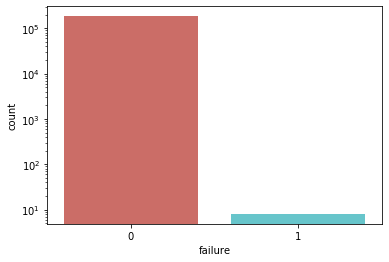

In [9]:
sns.countplot(x=df.failure,palette='hls').set_yscale("log")

#### We can observe that this data set is highly imbalanced.

## Number of Failed Hard-Drives Per Model

In [10]:
print(df.groupby('model')['failure'].sum().sort_values(ascending=False))

model
WDC WD60EFRX      3
WDC WD30EFRX      3
WDC WD10EACS      1
WDC WD5000LPVX    1
WDC WD2500BEVT    0
WDC WD10EADS      0
WDC WD10EADX      0
WDC WD10EARS      0
WDC WD1600AAJS    0
WDC WD1600BPVT    0
WDC WD20EFRX      0
WDC WD2500AAJS    0
WDC WD2500BPVT    0
WDC WD5003ABYX    0
WDC WD3200AAJS    0
WDC WD3200BEKX    0
WDC WD3200LPVX    0
WDC WD40EFRX      0
WDC WD5000BPKT    0
WDC WD5000LPCX    0
WDC WD5002ABYS    0
WDC WD1000FYPS    0
Name: failure, dtype: int64


## Number of Failed Hard-Drives with Serial Numbers

In [11]:
serial_Number = df.groupby('serial_number')['failure'].sum().sort_values(ascending=False)
serial_Number.head(10)

serial_number
WD-WX71A14S0199    1
WD-WX11D4438542    1
WD-WX11DA4DJ0XN    1
WD-WCC4N0319852    1
WD-WX31D847K0UN    1
WD-WMC4N0988747    1
WD-WCAU45694008    1
WD-WCC4N1SFT90L    1
WD-WMAYV3889545    0
WD-WMAYV3389057    0
Name: failure, dtype: int64

## Percentage of Hard-Drives Failed

In [12]:
# Total Number of Unique Hard-Drives
df['serial_number'].unique()

array(['WD-WMC4N2899475', 'WD-WX61A35NJXKT', 'WD-WX41A356N5N1', ...,
       'WD-WXP1AA53XX7V', 'WD-WX31A35H8J6A', 'WD-WXD1A95J8L1Y'],
      dtype=object)

In [13]:
data_aggregate = (df[['model','failure']].groupby('model',as_index = True)
                .agg({'model':'count', 'failure':'sum'})
                .rename(columns={'date': 'date_count', 'failure': 'failure_sum'})
                .sort_values(by=['failure_sum'],axis=0,ascending=False))
data_aggregate

,model,failure_sum
model,,
WDC WD30EFRX,94973,3
WDC WD60EFRX,38271,3
WDC WD5000LPVX,28547,1
WDC WD10EACS,243,1
WDC WD10EADS,1096,0
WDC WD3200BEKX,774,0
WDC WD5003ABYX,172,0
WDC WD5002ABYS,258,0
WDC WD5000LPCX,4176,0


Number of Hard-Drives :  22
Number of Failed Hard-Drives:  4
Percentage of Failed Hard-Drives:  18.181818181818183 %


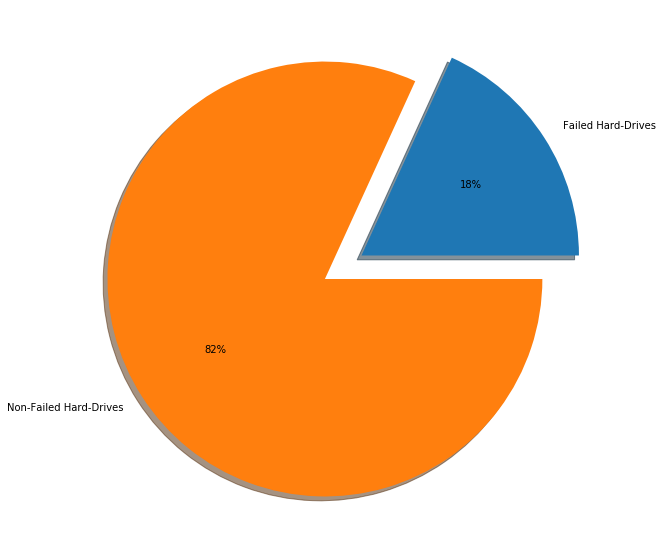

In [14]:
all_count = data_aggregate.shape[0]
broken_count = data_aggregate[data_aggregate.iloc[:, 1] >= 1].shape[0]
print ('Number of Hard-Drives : ',all_count)
print ('Number of Failed Hard-Drives: ',broken_count)
print ('Percentage of Failed Hard-Drives: ',broken_count/all_count*100,'%' )

fig = plt.figure(figsize=(10,10))
labels = ['Failed Hard-Drives','Non-Failed Hard-Drives']
shares = [broken_count,all_count-broken_count] 
plt.pie(shares,explode=(0.2,0),labels=labels,autopct='%.0f%%',shadow=True,)
plt.show()

## Normalization of Data

In [15]:
un_normalized = df.drop(['date', 'serial_number', 'model', 'capacity_bytes','failure'], axis=1)

In [16]:
un_normalized = un_normalized.reset_index(drop= True)
print(un_normalized.shape)
un_normalized.head()

(183671, 17)


,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw
0,0.0,6250.0,12.0,0.0,0.0,20972.0,0.0,0.0,12.0,3.0,674.0,30.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1258.0,50.0,0.0,0.0,7657.0,0.0,0.0,2.0,0.0,5410.0,27.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1300.0,27.0,0.0,0.0,4978.0,0.0,0.0,4.0,2.0,6273.0,30.0,0.0,0.0,0.0,0.0,0.0
3,0.0,9116.0,8.0,0.0,0.0,17198.0,0.0,0.0,8.0,0.0,729.0,25.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,14327.0,0.0,0.0,3.0,0.0,486.0,27.0,0.0,0.0,0.0,0.0,0.0


In [17]:
un_normalized.describe()

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw
count,183671.000000,183671.000000,183671.000000,183671.000000,183671.000000,183671.000000,183671.0,183671.0,183671.000000,183671.000000,1.836710e+05,183671.000000,183671.000000,183671.000000,183671.0,183671.000000,183671.000000
mean,14.964485,5204.360454,82.435627,0.018740,0.013040,21794.724616,0.0,0.0,20.981647,7.044346,1.184961e+05,25.903093,0.001143,0.005156,0.0,18.622706,0.025529
std,307.243332,2971.736497,794.108038,0.802408,2.777881,8479.261237,0.0,0.0,24.801962,62.797994,8.203192e+05,5.101043,0.035979,0.114599,0.0,728.017189,0.924272
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000e+00,13.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,1558.000000,11.000000,0.000000,0.000000,17834.000000,0.0,0.0,10.000000,1.000000,8.300000e+01,22.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,6100.000000,17.000000,0.000000,0.000000,21375.000000,0.0,0.0,15.000000,3.000000,8.140000e+02,25.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,6466.000000,34.000000,0.000000,0.000000,25438.000000,0.0,0.0,25.000000,6.000000,2.346750e+04,29.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,15658.000000,9741.000000,77237.000000,37.000000,798.000000,65110.000000,0.0,0.0,1767.000000,7963.000000,1.359792e+07,49.000000,2.000000,5.000000,0.0,33537.000000,41.000000


In [18]:
mms = MinMaxScaler()
cols = un_normalized.keys()
normalized_data = pd.DataFrame(mms.fit_transform(un_normalized), columns= cols)
normalized_data.head()

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw
0,0.0,0.641618,0.000142,0.0,0.0,0.322101,0.0,0.0,0.006229,0.000377,0.000050,0.472222,0.0,0.0,0.0,0.0,0.0
1,0.0,0.129145,0.000634,0.0,0.0,0.117601,0.0,0.0,0.000566,0.000000,0.000398,0.388889,0.0,0.0,0.0,0.0,0.0
2,0.0,0.133457,0.000337,0.0,0.0,0.076455,0.0,0.0,0.001699,0.000251,0.000461,0.472222,0.0,0.0,0.0,0.0,0.0
3,0.0,0.935838,0.000091,0.0,0.0,0.264138,0.0,0.0,0.003964,0.000000,0.000054,0.333333,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000026,0.0,0.0,0.220043,0.0,0.0,0.001133,0.000000,0.000036,0.388889,0.0,0.0,0.0,0.0,0.0


In [19]:
normalized_data.describe()

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw
count,183671.000000,183671.000000,183671.000000,183671.000000,183671.000000,183671.000000,183671.0,183671.0,183671.000000,183671.000000,183671.000000,183671.000000,183671.000000,183671.000000,183671.0,183671.000000,183671.000000
mean,0.000956,0.534274,0.001054,0.000506,0.000016,0.334737,0.0,0.0,0.011315,0.000885,0.008714,0.358419,0.000572,0.001031,0.0,0.000555,0.000623
std,0.019622,0.305075,0.010282,0.021687,0.003481,0.130230,0.0,0.0,0.014044,0.007886,0.060327,0.141696,0.017990,0.022920,0.0,0.021708,0.022543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.159943,0.000129,0.000000,0.000000,0.273906,0.0,0.0,0.005096,0.000126,0.000006,0.250000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.626219,0.000207,0.000000,0.000000,0.328291,0.0,0.0,0.007928,0.000377,0.000060,0.333333,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.663792,0.000427,0.000000,0.000000,0.390693,0.0,0.0,0.013590,0.000753,0.001726,0.444444,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


#### Since there is no significance of having 'smart_10_raw', 'smart_11_raw', and 'smart_198_raw' attributes, we drop the columns.

In [20]:
normalized_data = normalized_data.drop(['smart_10_raw', 'smart_11_raw', 'smart_198_raw'], axis=1)

In [21]:
normalized_data["failure"] = df.failure

## Normalized Dataset

In [22]:
new_col = list(normalized_data.columns)
new_col = [new_col[-1]] + new_col[:-1]
normalized = normalized_data[new_col]
normalized.head()

,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_199_raw,smart_200_raw
0,0,0.0,0.641618,0.000142,0.0,0.0,0.322101,0.006229,0.000377,0.000050,0.472222,0.0,0.0,0.0,0.0
1,0,0.0,0.129145,0.000634,0.0,0.0,0.117601,0.000566,0.000000,0.000398,0.388889,0.0,0.0,0.0,0.0
2,0,0.0,0.133457,0.000337,0.0,0.0,0.076455,0.001699,0.000251,0.000461,0.472222,0.0,0.0,0.0,0.0
3,0,0.0,0.935838,0.000091,0.0,0.0,0.264138,0.003964,0.000000,0.000054,0.333333,0.0,0.0,0.0,0.0
4,0,0.0,0.000000,0.000026,0.0,0.0,0.220043,0.001133,0.000000,0.000036,0.388889,0.0,0.0,0.0,0.0


## Normalized Dataset Basic Information

In [23]:
normalized.columns

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_196_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_200_raw'],
      dtype='object')

In [24]:
normalized.shape

(183671, 15)

## Check for Null Values in the Normalized Dataset

In [25]:
normalized.isnull().sum()

failure          0
smart_1_raw      0
smart_3_raw      0
smart_4_raw      0
smart_5_raw      0
smart_7_raw      0
smart_9_raw      0
smart_12_raw     0
smart_192_raw    0
smart_193_raw    0
smart_194_raw    0
smart_196_raw    0
smart_197_raw    0
smart_199_raw    0
smart_200_raw    0
dtype: int64

## Feature Selection

In [26]:
X_Selected = normalized.drop(['failure'], axis = 1)
y_Selected = normalized['failure']

In [27]:
X_Selected.head()

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_199_raw,smart_200_raw
0,0.0,0.641618,0.000142,0.0,0.0,0.322101,0.006229,0.000377,0.000050,0.472222,0.0,0.0,0.0,0.0
1,0.0,0.129145,0.000634,0.0,0.0,0.117601,0.000566,0.000000,0.000398,0.388889,0.0,0.0,0.0,0.0
2,0.0,0.133457,0.000337,0.0,0.0,0.076455,0.001699,0.000251,0.000461,0.472222,0.0,0.0,0.0,0.0
3,0.0,0.935838,0.000091,0.0,0.0,0.264138,0.003964,0.000000,0.000054,0.333333,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000026,0.0,0.0,0.220043,0.001133,0.000000,0.000036,0.388889,0.0,0.0,0.0,0.0


### Feature Selection Using Correlation Matrix

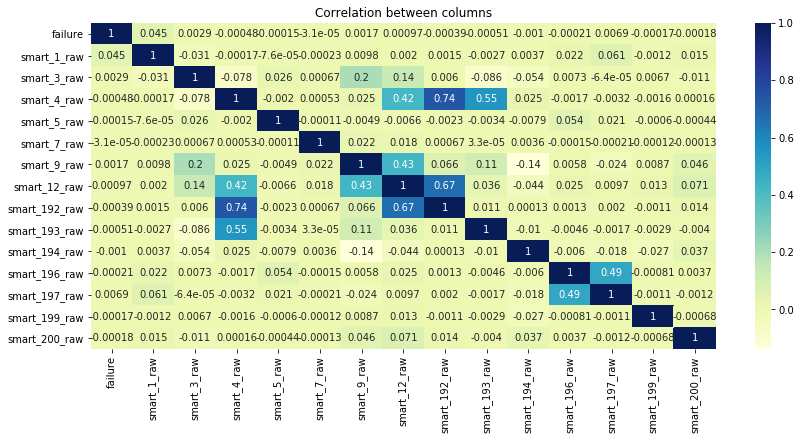

In [28]:
f,ax = plt.subplots(figsize=(14, 6))
ax = sns.heatmap(normalized.corr(), annot = True, cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation between columns")
plt.show()

### Dropping Columns with Correlation Greater Than 80%

In [29]:
corr_matrix = normalized.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print("Droped Columns: {}".format(to_drop))

normalized = normalized.drop(normalized[to_drop], axis=1)
print(normalized.shape)
normalized.head()

Droped Columns: []
(183671, 15)


,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_196_raw,smart_197_raw,smart_199_raw,smart_200_raw
0,0,0.0,0.641618,0.000142,0.0,0.0,0.322101,0.006229,0.000377,0.000050,0.472222,0.0,0.0,0.0,0.0
1,0,0.0,0.129145,0.000634,0.0,0.0,0.117601,0.000566,0.000000,0.000398,0.388889,0.0,0.0,0.0,0.0
2,0,0.0,0.133457,0.000337,0.0,0.0,0.076455,0.001699,0.000251,0.000461,0.472222,0.0,0.0,0.0,0.0
3,0,0.0,0.935838,0.000091,0.0,0.0,0.264138,0.003964,0.000000,0.000054,0.333333,0.0,0.0,0.0,0.0
4,0,0.0,0.000000,0.000026,0.0,0.0,0.220043,0.001133,0.000000,0.000036,0.388889,0.0,0.0,0.0,0.0


### Feature Selection Using Recursive Feature Selection (RFE) by SMOTE, StratifiedKFold, and Random Forest Classifier

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def Average(lst): 
    return sum(lst) / len(lst) 

# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #---------------------------------------------
    #print("\nSMOTE")
    sm = SMOTE(random_state=12)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    #----------------------------------------------
    # create the RFE model and select 5 attributes
    model = RandomForestClassifier(max_depth=2, random_state=0)
    rfe = RFE(model, 5)
    rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
    
    X_train_smote = rfe.transform( X_train_smote)
    xTest = rfe.transform(xTest)
    
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    
    # create a base classifier used to evaluate a subset of attributes
    a = model.fit(X_train_smote, y_train_smote.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))

print('Optimal number of features: {}'.format(rfe.n_features_))
features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
print('Selected features: {}'.format(features))
print('cnf matrix:\n {}'.format(cnf_matrix))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Optimal number of features: 5
Selected features: ['smart_1_raw', 'smart_3_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw']
cnf matrix:
 [[27228  9504]
 [    0     1]]

Balanced Accuracy Score: [0.4891106089891923, 0.47533552936052054, 0.45294421909454713, 0.4484917782859632, 0.8706305129042797]
Balanced Accuracy Score Mean Value: 0.5473025297269005

F1_score: [0.4944817526283921, 0.4873423021100815, 0.4752967390838582, 0.4728405160660725, 0.42580876144581736]
F1_score Mean Value: 0.47115401426684433

Accuracy: [0.9781679597114469, 0.950619300394719, 0.90583911800735, 0.8969591375602319, 0.7412680695832086]
Accuracy Mean: 0.8945707170513912

RFE ranking: 

   0   1   2   3   4   5   6   7   8   9   10  11  12  13
0   1   1  10   9   8   7   1   5   1   1   6   2   3   4
1   1   7   1  10   9   6   1   3   1   1   8   2   5   4
2   1   1  10   9   8   6   1   2   1   1   7   5   3   4
3   1   1   8  10   9   7   1   2   1   1   6   4   5   3
4   1   1   8  10   9   7   2   1   1 

#### Ranking of Features

In [31]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] = ['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_196_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_200_raw']
rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
0,1.0,smart_1_raw
8,1.0,smart_193_raw
9,1.0,smart_194_raw
6,1.2,smart_12_raw
1,2.2,smart_3_raw
7,2.6,smart_192_raw
11,3.4,smart_197_raw
13,3.6,smart_200_raw
12,4.2,smart_199_raw
5,6.6,smart_9_raw


#### Based on the Recursive Feature Selection using the StratifiedKFold and Random Forest Classifier, we observe that the following are the top 5 - SMART features have more significance in predicting the failures of the hard-drives:

* 'smart_1_raw'
* 'smart_3_raw'
* 'smart_192_raw'
* 'smart_193_raw'
* 'smart_194_raw'

#### Therefore, we choose the below top 6 - SMART features for modeling.

* 'smart_1_raw'
* 'smart_3_raw'
* 'smart_9_raw'
* 'smart_192_raw'
* 'smart_193_raw'
* 'smart_194_raw'

## Predictive Model Using SMOTE, StratifiedShuffleSplit and Random Forest Classifier 

In [32]:
normalized.columns

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_196_raw', 'smart_197_raw',
       'smart_199_raw', 'smart_200_raw'],
      dtype='object')

In [33]:
X_Selected = normalized.drop(['failure', 'smart_4_raw', 'smart_5_raw','smart_7_raw',
                              'smart_12_raw', 'smart_196_raw','smart_197_raw', 'smart_199_raw', 'smart_200_raw'], axis = 1)
y_Selected = normalized['failure']

In [34]:
#Dividing the data into response variable and attributes
X = np.array(X_Selected)
y = np.array(y_Selected)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (183671, 6)
Shape of y: (183671,)


In [35]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print('Number of StratifiedShuffleSplits:',sss.get_n_splits(X, y))

Number of StratifiedShuffleSplits: 5


In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    smt = SMOTE(random_state=12)
    X_smt, y_smt = smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_smt, y_smt)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    print(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

TRAIN: [ 39171   7310   2685 ...  16136  60764 181363] TEST: [ 91394  33857 136684 ...  69130  29298 127091]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 83.43980254800188%
[[45976  9124]
 [    1     1]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     55100
           1       0.00      0.50      0.00         2

    accuracy                           0.83     55102
   macro avg       0.50      0.67      0.45     55102
weighted avg       1.00      0.83      0.91     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [ 45326  16048  21295 ... 163566  85153 132333] TEST: [124532 100485   6675 ...  62978  25163 128996]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 83.45250626111574%
[[45983  9117]
 [    1     1]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     55100
           1       0.00      0.50      0.00         2

    accuracy                           0.83     55102
   macro avg       0.50      0.67      0.46     55102
weighted avg       1.00      0.83      0.91     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [  9250 146920 133817 ...  13242  60872 120895] TEST: [ 51557  94707 101330 ...  66880  22136  91535]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 83.69569162643825%
[[46117  8983]
 [    1     1]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     55100
           1       0.00      0.50      0.00         2

    accuracy                           0.84     55102
   macro avg       0.50      0.67      0.46     55102
weighted avg       1.00      0.84      0.91     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [103194  55133  91079 ...  92072  66329  43457] TEST: [ 40177  93932  51695 ...  94768  88311 118862]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 83.39443214402381%
[[45951  9149]
 [    1     1]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     55100
           1       0.00      0.50      0.00         2

    accuracy                           0.83     55102
   macro avg       0.50      0.67      0.45     55102
weighted avg       1.00      0.83      0.91     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [ 66747 113609  49259 ... 172683 124874  76529] TEST: [ 36094  33418  16403 ... 175816 174515   6938]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 83.55776559834489%
[[46040  9060]
 [    0     2]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     55100
           1       0.00      1.00      0.00         2

    accuracy                           0.84     55102
   macro avg       0.50      0.92      0.46     55102
weighted avg       1.00      0.84      0.91     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### ROC Curve

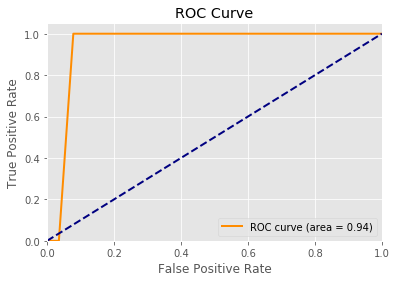

In [38]:
plt.style.use('ggplot')

y_predict_probabilities = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Text(0.5, 1, 'Confusion Matrix')

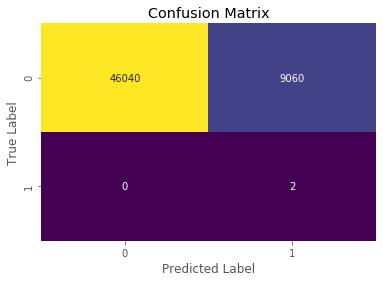

In [39]:
x_axis_labels = [0,1]
y_axis_labels = [0,1]

sns.heatmap(cnf_matrix,annot=True,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels,fmt="g",cmap='viridis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

### Literarture Predictive Model Using SMOTE, StratifiedShuffleSplit and Random Forest Classifier 

#### According to the litrature, below are the following SMART features that were used to predict the hard-drive failures:

* 'smart_5_raw'
* 'smart_12_raw'
* 'smart_187_raw'
* 'smart_189_raw'
* 'smart_190_raw'
* 'smart_198_raw'
* 'smart_199_raw'
* 'smart_200_raw'

In [40]:
X_Lit_Selected = normalized.drop(['failure', 'smart_1_raw', 'smart_3_raw','smart_4_raw','smart_7_raw',
                              'smart_192_raw', 'smart_193_raw', 'smart_196_raw','smart_197_raw'], axis = 1)
y_Lit_Selected = normalized['failure']

In [41]:
#Dividing the data into response variable and attributes
X = np.array(X_Lit_Selected)
y = np.array(y_Lit_Selected)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (183671, 6)
Shape of y: (183671,)


In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print('Number of StratifiedShuffleSplits:',sss.get_n_splits(X, y))

Number of StratifiedShuffleSplits: 5


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Test_set '1': {}".format(sum(y_test==1)))
    print("Test_set '0': {} \n".format(sum(y_test==0)))
    #---------------------------------------------
    print('Original dataset shape %s' % Counter(y))
    smt = SMOTE(random_state=12)
    X_smt, y_smt = smt.fit_sample(X, y)
    print('Resampled dataset shape %s' % Counter(y_smt))
    #----------------------------------------------
    print("\nDecision Tree Classifier")
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_smt, y_smt)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    print(cnf_matrix)
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

TRAIN: [ 39171   7310   2685 ...  16136  60764 181363] TEST: [ 91394  33857 136684 ...  69130  29298 127091]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 48.03273928351058%
[[26466 28634]
 [    1     1]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65     55100
           1       0.00      0.50      0.00         2

    accuracy                           0.48     55102
   macro avg       0.50      0.49      0.32     55102
weighted avg       1.00      0.48      0.65     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [ 45326  16048  21295 ... 163566  85153 132333] TEST: [124532 100485   6675 ...  62978  25163 128996]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 48.33762839824326%
[[26633 28467]
 [    0     2]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65     55100
           1       0.00      1.00      0.00         2

    accuracy                           0.48     55102
   macro avg       0.50      0.74      0.33     55102
weighted avg       1.00      0.48      0.65     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [  9250 146920 133817 ...  13242  60872 120895] TEST: [ 51557  94707 101330 ...  66880  22136  91535]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 48.06903560669304%
[[26485 28615]
 [    0     2]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65     55100
           1       0.00      1.00      0.00         2

    accuracy                           0.48     55102
   macro avg       0.50      0.74      0.32     55102
weighted avg       1.00      0.48      0.65     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [103194  55133  91079 ...  92072  66329  43457] TEST: [ 40177  93932  51695 ...  94768  88311 118862]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 47.81496134441581%
[[26346 28754]
 [    1     1]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65     55100
           1       0.00      0.50      0.00         2

    accuracy                           0.48     55102
   macro avg       0.50      0.49      0.32     55102
weighted avg       1.00      0.48      0.65     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
TRAIN: [ 66747 113609  49259 ... 172683 124874  76529] TEST: [ 36094  33418  16403 ... 175816 174515   6938]
Test_set '1': 2
Test_set '0': 55100 

Original dataset shape Counter({0: 183663, 1: 8})
Resampled dataset shape Counter({0: 183663, 1: 183663})

Decision Tree Classifier


C:\Users\yvsrs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


classifier_accuracy = 48.25777648724184%
[[26589 28511]
 [    0     2]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65     55100
           1       0.00      1.00      0.00         2

    accuracy                           0.48     55102
   macro avg       0.50      0.74      0.33     55102
weighted avg       1.00      0.48      0.65     55102


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### ROC Curve

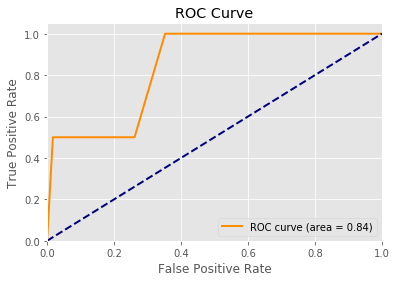

In [44]:
plt.style.use('ggplot')

y_predict_probabilities = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

Text(0.5, 1, 'Confusion Matrix')

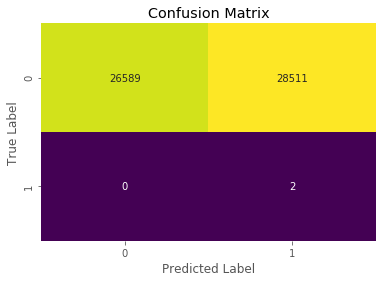

In [45]:
x_axis_labels = [0,1]
y_axis_labels = [0,1]

sns.heatmap(cnf_matrix,annot=True,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels,fmt="g",cmap='viridis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

## Results

* Since the we are using the literature work of 2013 and the they author's of the paper have used the features based on the entire data set, they have selected the ['smart_5_raw', 'smart_12_raw', 'smart_198_raw', 'smart_199_raw', 'smart_200_raw'] features for the entire data set instead of confining the dataset to Western Digital.

* The Litature shows that by applying few resmapling techniques like Random Over Sampling, Random Under Sampling, SMOTE, or ADASYN, we can actually get rid of the imbalanceness of the dataset.

* For the Hard-drives manufactured by the Western Digital, we have selected the top 6 - SMART features ['smart_1_raw', 'smart_3_raw', 'smart_9_raw', 'smart_192_raw', 'smart_193_raw', 'smart_194_raw'] using the Recursive Feature Selection (RFE). These 6 - SMART features were completely different when compared with the features that were used in the literature. 

* Finally, after building the predictive model using the Radon Forest Classifier, we have improved the accuracy to 83% by reducing the number of 'False Alarms'. 